<h3><a href="https://pollytikhonova.github.io/bioinformatics_homeworks/Medicine_modelling"><img src="https://pollytikhonova.github.io/bioinformatics_homeworks/GitHub-Mark-32px.png" alt="Вернуться в репозиторий" title="Вернуться в репозиторий" style="max-width:100%;  display: inline-block; margin-right: 10px;"></a>
Tikhonova Polina. Homework 5. </h3>

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

%matplotlib inline

In [51]:
def gen_inp(length = 1.52986, hcc = 111.200, tor1 = 180):
    inp = '''!HF RHF 6-31G
    * int 0 1
    C 0 0 0 0 0 0 
    C 1 0 0 {0} 0 0 
    H 1 2 0 1.08439 {1} 0
    H 1 2 3 1.08439 {1} 120
    H 1 2 3 1.08439 {1} -120
    H 2 1 3 1.08439 {1} {2}
    H 2 1 5 1.08439 {1} {3}
    H 2 1 5 1.08439 {1} {4}
    *
    '''.format(length, hcc, tor1, tor1-60, tor1+60)
    return inp

def show_plot(x,y, title, formula = None, p0 = None):
    x_o = x
    y_o = y
    #function is  f(x)=k(b-x)^2 + a
    fitfunc = lambda p, x: p[0]*pow(p[1]-x,2) + p[2] if formula is None else eval(formula) # Target function
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function

    p0 = [1,1, -79] if p0 is None else p0# Initial guess for the parameters
    p1, success = optimize.leastsq(errfunc, p0[:], args=(x_o, y_o))
    print("Optimized params:", p1)

    #Plot it
    plt.figure(figsize=(15,6))
    plt.plot(x_o, y_o, "ro", x_o,fitfunc(p1,x_o),"r-",c='blue',alpha=0.5)

    if formula is None:
        plt.title(title.replace('_', ' ').title(), fontsize=18)
    else:
        plt.title(title.replace('_', ' '), fontsize=18)
    return p1
#    plt.show()

In [16]:
def run_orca(inp, filename):
    with open('orca_%s.inp'%filename, 'w') as outfile:
        outfile.write(inp)
    p = subprocess.Popen("/home/shad/progs/bin/orca orca_%s.inp"%filename,
                          shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out=p.communicate()[0]
    out.splitlines()
    energy = float(str(out).split('FINAL SINGLE POINT ENERGY')[1].split('\\n')[0])
    return energy

### Зависимость энергии молекулы от длины связи C-C

Optimized params: [  0.63991911   1.55699289 -79.08219401]


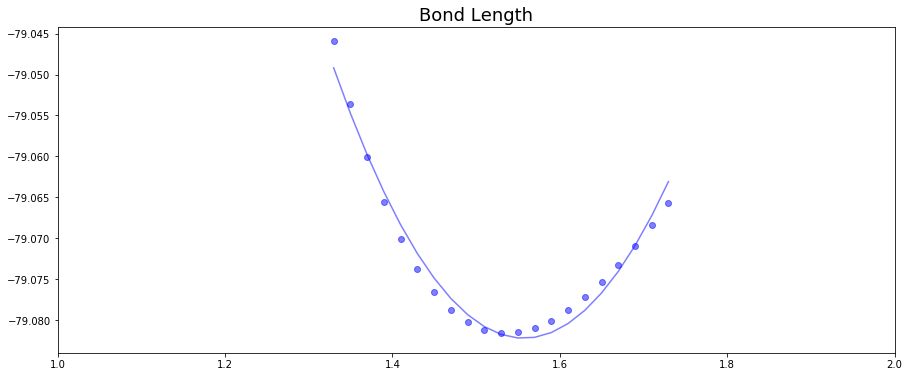

In [13]:
filename = 'bond_length'
exec('%s = np.arange(-0.2, 0.22, 0.02)+1.52986'%filename)
energies = [run_orca(gen_inp(length=i), filename) for i in eval(filename)]
with open('energy_orca_%s.inp'%filename, 'w') as outfile:
        outfile.write(','.join([str(i) for i in energies]))
show_plot(bond_length, energies, filename)

### Зависимость энергии молекулы от  валентного угла HCС

Optimized params: [  3.30817650e-04   1.12271981e+02  -7.90819114e+01]


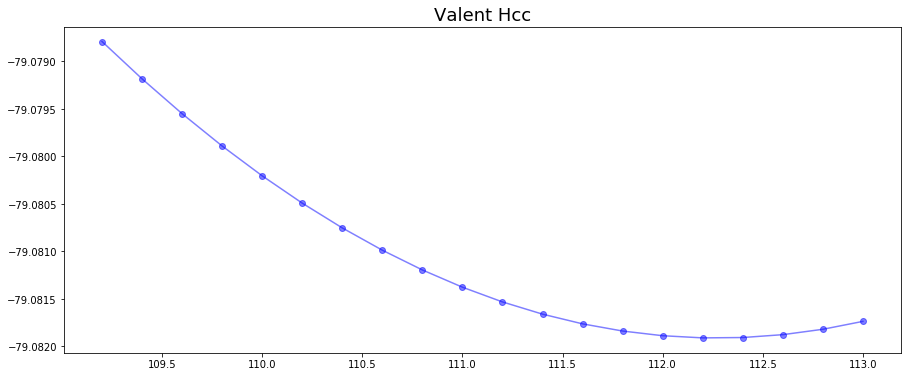

In [52]:
filename = 'valent_hcc'
exec('%s = np.arange(109.2, 113.2, 0.2)'%filename)
energies = [run_orca(gen_inp(hcc=i), filename) for i in eval(filename)]
with open('energy_orca_%s.inp'%filename, 'w') as outfile:
        outfile.write(','.join([str(i) for i in energies]))
show_plot(eval(filename), energies, filename);

### Зависимость энергии молекулы от торсионного угла CС

In [54]:
filename = 'torsion_cc'
exec('%s = np.arange(-180, 182, 12)'%filename)
energies = [run_orca(gen_inp(tor1=i), filename) for i in eval(filename)]
with open('energy_orca_%s.inp'%filename, 'w') as outfile:
        outfile.write(','.join([str(i) for i in energies]))

Optimized params: [  1.33660680e-08  -8.75550811e+01  -7.90827629e+01]
Optimized params: [  1.81238996e-03   9.94840953e-01   2.15918922e+00  -7.90825389e+01]
3 точки локального минимума.


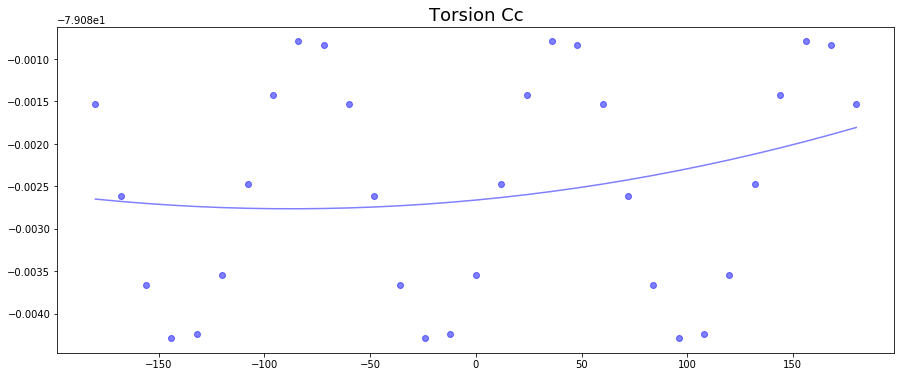

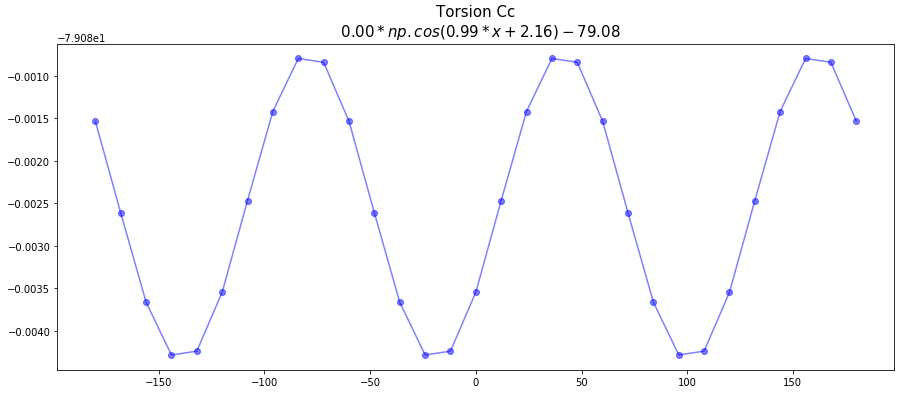

In [55]:
#fig = plt.figure(figsize=(10, 10))
#plt.subplots_adjust(hspace=0.4)
#ax = fig.add_subplot(211)
filename = 'torsion_cc'
show_plot(eval(filename), energies, filename)
#ax = fig.add_subplot(212)
params = show_plot(eval(filename), energies, filename, 
          'p[0]*np.cos(p[1]*x+p[2])+p[3]', [0.02,1,1,-1])
plt.title(filename.replace('_', ' ').title()+'\n  $%.2f*np.cos(%.2f*x+%.2f)%.2f$'%tuple(params), fontsize=15);
print('3 точки локального минимума.')

### Зависимость энергии молекулы от длины связи C-C с шагом 0.1Å

In [56]:
filename = 'bond_length_01'
exec('%s = np.arange(-1, 1.1, 0.1)+1.52986'%filename)
energies = [run_orca(gen_inp(length=i), filename) for i in eval(filename)]
with open('energy_orca_%s.inp'%filename, 'w') as outfile:
        outfile.write(','.join([str(i) for i in energies]))

Optimized params: [  2.64135254   1.81379259 -79.55943724]
Optimized params: [  5.88057634  -5.24264163 -79.04492107   2.74919871]


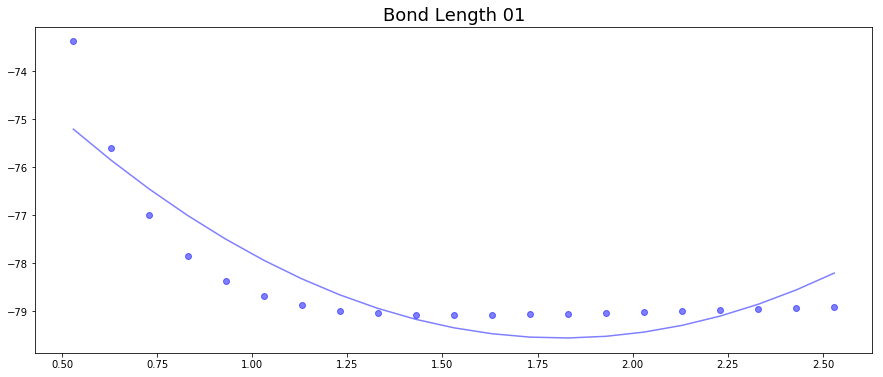

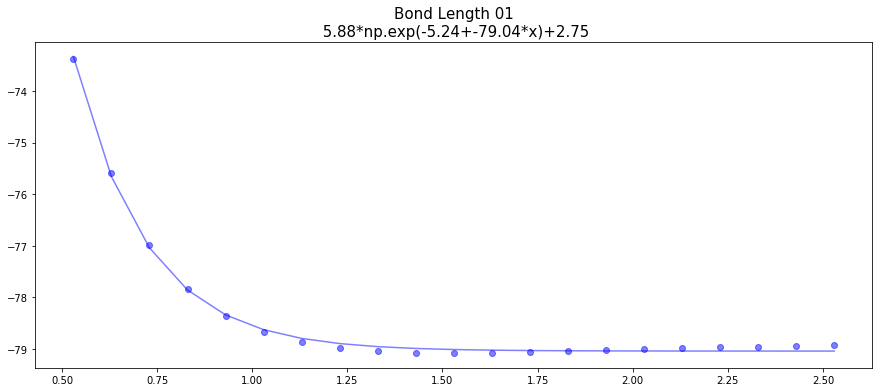

In [72]:
plt.subplots_adjust(hspace=0.4);
show_plot(eval(filename), energies, filename);
params = show_plot(eval(filename), energies, '%s $1/x^3$'%filename.replace('_', ' ').title(),
          'p[0]*np.exp(p[3]+p[1]*x)+p[2]', [6,0,1,3]);
plt.title(filename.replace('_', ' ').title() +'\n %.2f*np.exp(%.2f+%.2f*x)+%.2f'%(tuple(params)), fontsize=15);

#### <a href='Tikhonova. HW5.ipynb'> Download this notebook </a>